In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Kritika11#',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = "C:/Users/shivk/Desktop/Coding related/E-Commerce"

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import mysql.connector

db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Kritika11#',
    database='ecommerce'
)
cur = db.cursor()

# List all unique cities where customers are Located

In [3]:
query="""select distinct customer_city from customers """
cur.execute(query)
data= cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [4]:
query="""select count(order_id )from orders where year(order_purchase_timestamp) = 2017 """
cur.execute(query)
data= cur.fetchall()
"Total orders placed in 2017 are ", data[0][0]

('Total orders placed in 2017 are ', 90202)

# Find the total sales per category

In [5]:
query = """ select products.product_category category, sum(payments.payment_value) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """

cur.execute(query)
data= cur.fetchall()
data

[('perfumery', 1013477.3197881877),
 ('Furniture Decoration', 2860352.7835532315),
 ('telephony', 973764.1014252491),
 ('bed table bath', 3425107.342006538),
 ('automotive', 1704588.6622505188),
 ('computer accessories', 3170660.8925165795),
 ('housewares', 2189516.260567773),
 ('babies', 1079691.319470048),
 ('toys', 1238075.3789587803),
 ('Furniture office', 1293652.9742970467),
 ('Cool Stuff', 1559396.0000973642),
 ('HEALTH BEAUTY', 3314746.238787111),
 ('pet Shop', 622537.940602839),
 ('General Interest Books', 129389.51923084259),
 ('stationary store', 634880.1393175125),
 ('Watches present', 2858433.3571849167),
 ('PCs', 558243.0987319946),
 ('climatization', 182341.31897354126),
 ('Construction Tools Construction', 482951.2605175972),
 ('sport leisure', 2784255.1182990447),
 ('Bags Accessories', 374302.5807700753),
 ('electronics', 519714.19934826717),
 ('Casa Construcao', 273290.5806130767),
 ('Games consoles', 390960.75825071335),
 ('Fashion Bags and Accessories', 436316.56004

In [6]:
query = """ select products.product_category category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """

cur.execute(query)
data= cur.fetchall()
data

[('perfumery', 1013477.32),
 ('Furniture Decoration', 2860352.78),
 ('telephony', 973764.1),
 ('bed table bath', 3425107.34),
 ('automotive', 1704588.66),
 ('computer accessories', 3170660.89),
 ('housewares', 2189516.26),
 ('babies', 1079691.32),
 ('toys', 1238075.38),
 ('Furniture office', 1293652.97),
 ('Cool Stuff', 1559396.0),
 ('HEALTH BEAUTY', 3314746.24),
 ('pet Shop', 622537.94),
 ('General Interest Books', 129389.52),
 ('stationary store', 634880.14),
 ('Watches present', 2858433.36),
 ('PCs', 558243.1),
 ('climatization', 182341.32),
 ('Construction Tools Construction', 482951.26),
 ('sport leisure', 2784255.12),
 ('Bags Accessories', 374302.58),
 ('electronics', 519714.2),
 ('Casa Construcao', 273290.58),
 ('Games consoles', 390960.76),
 ('Fashion Bags and Accessories', 436316.56),
 ('home appliances', 191064.54),
 ('Garden tools', 1676561.5),
 ('Agro Industria e Comercio', 237461.22),
 (None, 505603.42),
 ('audio', 120649.24),
 ('technical books', 49830.88),
 ('Constructio

In [7]:
query = """ select products.product_category category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


In [8]:
# By defining column names
query = """ select products.product_category category, round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category """

cur.execute(query)
data= cur.fetchall()
df=pd.DataFrame(data,columns = ["Category","Sales"])
df

,Category,Sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


# calculate the percentage of orders that were paid in installments


In [9]:
query="""select sum(case when payment_installments >=1 then 1
else 0 end )  from payments"""
cur.execute(query)
data= cur.fetchall()
"Total orders placed in 2017 are ", data[0][0]

('Total orders placed in 2017 are ', Decimal('103884'))

In [10]:
# by dividing count of call
query="""select (sum(case when payment_installments >=1 then 1
else 0 end ))/count(*)*100 from payments"""
cur.execute(query)
data= cur.fetchall()
"Total percentage of orders that were paid in installments are  ", data[0][0]

('Total percentage of orders that were paid in installments are  ',
 Decimal('99.9981'))

# Count the  number of customers from each state.

In [11]:
query = """
SELECT customer_state, COUNT(customer_id)
FROM customers
GROUP BY customer_state
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data

[('SP', 83492),
 ('SC', 7274),
 ('MG', 23270),
 ('PR', 10090),
 ('RJ', 25704),
 ('RS', 10932),
 ('PA', 1950),
 ('GO', 4040),
 ('ES', 4066),
 ('BA', 6760),
 ('MA', 1494),
 ('MS', 1430),
 ('CE', 2672),
 ('DF', 4280),
 ('RN', 970),
 ('PE', 3304),
 ('MT', 1814),
 ('AM', 296),
 ('AP', 136),
 ('AL', 826),
 ('RO', 506),
 ('PB', 1072),
 ('TO', 560),
 ('PI', 990),
 ('AC', 162),
 ('SE', 700),
 ('RR', 92)]

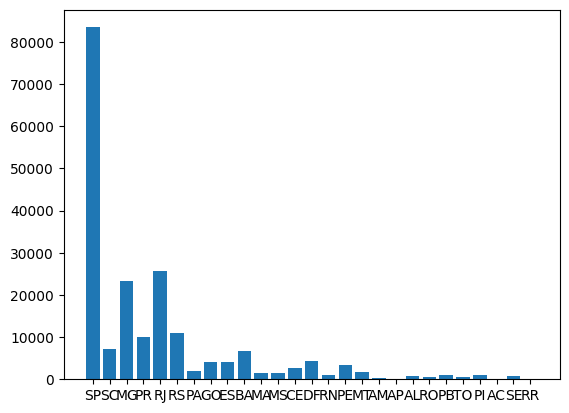

In [12]:
# defining columns
query = """
SELECT customer_state, COUNT(customer_id)
FROM customers
GROUP BY customer_state
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data

# Create a DataFrame
df = pd.DataFrame(data, columns=['Customer State', 'Count'])
df
plt.bar(df['Customer State'], df['Count'])
plt.show()

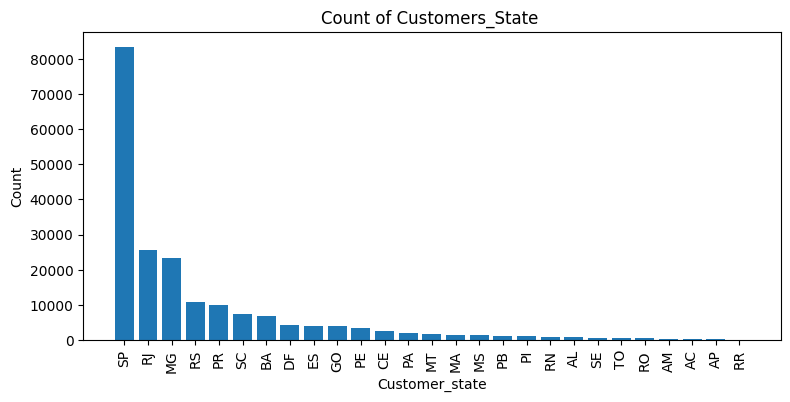

In [13]:
#giving rotation 
# sorting
query = """
SELECT customer_state, COUNT(customer_id)
FROM customers
GROUP BY customer_state
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data

# Create a DataFrame
df = pd.DataFrame(data, columns=['Customer State', 'Count'])
df
df=df.sort_values(by = 'Count',ascending=False)
plt.figure(figsize=(9,4))
plt.bar(df['Customer State'], df['Count'])
plt.xticks(rotation=90)
plt.xlabel("Customer_state")
plt.ylabel("Count")
plt.title("Count of Customers_State ")
plt.show()

# Calculate the number of orders per month in 2018

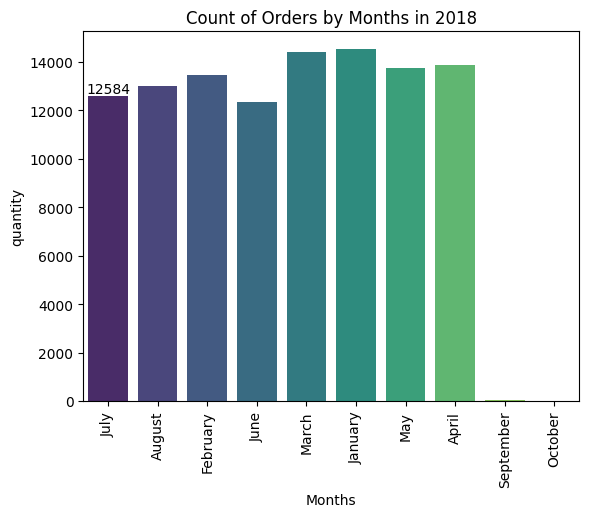

In [14]:
query = """
SELECT monthname(order_purchase_timestamp) months,COUNT(order_id)
from orders  where year(order_purchase_timestamp)=2018
GROUP BY  months
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()
# Print the fetched data
data
df = pd.DataFrame(data, columns=['Months', 'quantity'])
df
ax=sns.barplot(x=df['Months'], y= df['quantity'],data=df,hue=df['Months'],palette="viridis")
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
plt.title("Count of Orders by Months in 2018")
plt.show()

# Find the average number of Products per order,grouped by Customer City

In [15]:
query = """
with Count_per_order as 
(SELECT orders.order_id,orders.customer_id,
COUNT(order_items.order_id) as oc
from orders 
join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

SELECT customers.customer_city,
round(avg(count_per_order.oc),2)
from customers
join  count_per_order
on customers.customer_id = count_per_order.customer_id
group by  customers.customer_city;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()
# Print the fetched data
data
df = pd.DataFrame(data, columns=['Customer_city', 'Average'])
df.head(10)


,Customer_city,Average
0,treze tilias,2.55
1,indaial,2.23
2,sao jose dos campos,2.28
3,sao paulo,2.31
4,porto alegre,2.35
5,santos,2.32
6,sao francisco do sul,2.47
7,sao vicente,2.18
8,joinville,2.21
9,sao vendelino,2.00


# Calculate the Percentahe of total Revenue Contributed by each Product Category

In [16]:
query = """
select upper( products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value)
from ecommerce.payments))*100,2) sales_percentage
from ecommerce.products 
join ecommerce.order_items
on products.product_id = order_items.product_id
join ecommerce.payments
on payments.order_id = order_items.order_id
group by category 
order by sales_percentage desc;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['Category', 'Percentage Distribution'])
df.head(10)


,Category,Percentage Distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
5,SPORT LEISURE,17.39
6,HOUSEWARES,13.68
7,AUTOMOTIVE,10.65
8,GARDEN TOOLS,10.47
9,COOL STUFF,9.74


# Identify the correlation between Product Price and the number of times a Product has been purchased

In [17]:
import numpy as np;
query = """
SELECT products.product_category,
COUNT(order_items.product_id),
round(avg(order_items.price),2)
From ecommerce.products
join ecommerce.order_items
on products.product_id = order_items.product_id
group by products.product_category;

"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['Category', 'Order_Count','Price'])
df
arr1 = df['Order_Count']
arr2 = df["Price"]
a = np.corrcoef([arr1,arr2])
print("the correlation between Product Price and the number of times a Product has been purchased", a[0][-1])

the correlation between Product Price and the number of times a Product has been purchased -0.10631514167157562


# Calculate the total revenue generated by each other and rank them by revenue

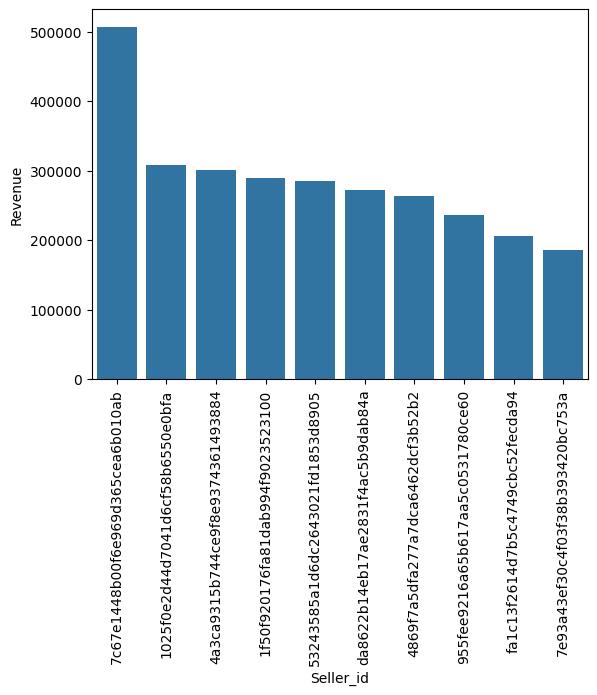

In [18]:
query = """
SELECT * ,dense_rank()
over (order by revenue desc)  as rn
from
(SELECT order_items.seller_id,
sum(payments.payment_value)
revenue from order_items
join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a

"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['Seller_id', 'Revenue','rank'])
df=df.head(10)
sns.barplot(x='Seller_id',y='Revenue',data = df)
plt.xticks(rotation=90)
plt.show()

# Calculate the moving average of order values for each customer over their order history

In [20]:
query = """
select customer_id,order_purchase_timestamp,payment,
avg(payment)
over(partition by customer_id 
order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg 
from
(SELECT orders.customer_id,orders.order_purchase_timestamp,
payments.payment_value as payment
From ecommerce.payments
join ecommerce.orders
on payments.order_id = orders.order_id) as a;

"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['customer_id', 'History','Price','Moving_Average'])
df

,customer_id,History,Price,Moving_Average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
...,...,...,...,...
207767,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
207768,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207769,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
207770,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


 # Calculate the cumulative sales per month for each year

In [21]:
query = """
select years,months,payment,
sum(payment)
over(order by years,months)
cumulative_sales
from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value) ,2) as payment
from ecommerce.orders
join ecommerce.payments
on orders.order_id = payments.order_id
group by  years,months order by years, months) as a;

"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['year', 'months','payment','Cumulative _sales'])
df

,year,months,payment,Cumulative _sales
0,2016,9,504.48,504.48
1,2016,10,118180.96,118685.44
2,2016,12,39.24,118724.68
3,2017,1,276976.08,395700.76
4,2017,2,583816.02,979516.78
5,2017,3,899727.20,1879243.98
6,2017,4,835576.06,2714820.04
7,2017,5,1185837.64,3900657.68
8,2017,6,1022552.76,4923210.44
9,2017,7,1184765.84,6107976.28


# Calculate the year - over - year growth rate of total sales.

In [46]:
query = """
with a as(
select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value) ,2) as payment
from ecommerce.orders
join ecommerce.payments
on orders.order_id = payments.order_id
group by  years order by years)

select years,((payment - lag(payment,1) over(order by years))/ lag(payment,1) over(order by years))*100 from a;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data
df = pd.DataFrame(data, columns=['year','yoy % gowth'])
df


,year,yoy % gowth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [45]:
query = """
with a as 
(SELECT customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from ecommerce.customers
join ecommerce.orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

 b as
(Select a.customer_id,count(distinct orders.order_purchase_timestamp) next_order
from a join ecommerce.orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order,interval 6 month)
group by a.customer_id)

select 100 * (count(distinct a.customer_id)/ count(distinct b.customer_id))
from a left join b 
on a.customer_id = b.customer_id;
"""

# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
data



[(None,)]

# Identify the top 3 customers who spent the most money in each yaer

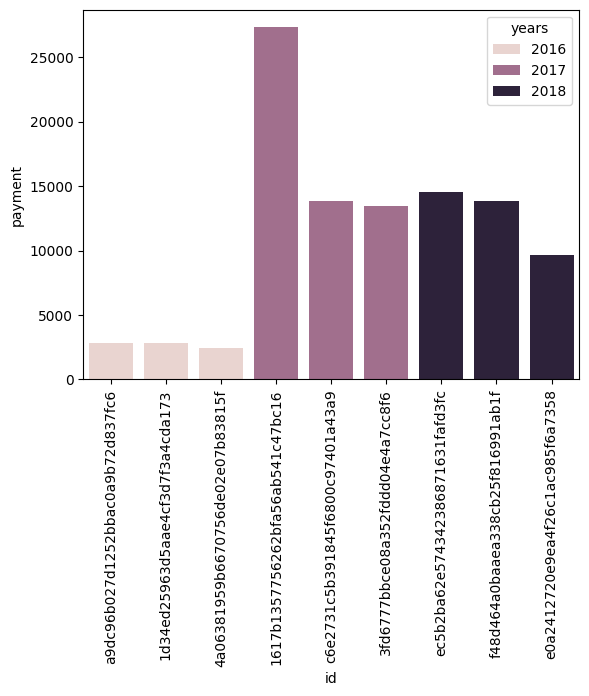

In [53]:
query=""" 
select years,customer_id,payment,D_rank 
from
(Select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over (
partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value)desc) D_rank
from ecommerce.orders
join ecommerce.payments
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where D_rank <= 3;
"""
# Execute the query
cur.execute(query)
data = cur.fetchall()

# Print the fetched data
df = pd.DataFrame(data, columns=['years','id','payment','D_rank'])

sns.barplot(x="id", y = "payment", data= df, hue="years")
plt.xticks(rotation=90)
plt.show()